## Spam CLassifier using Naive Bayes (Natural Language Processing)

### Import Libraries and Packages

In [177]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', -1)
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

**Read Data** 

In [178]:
data = pd.read_csv('C:/Users/prana/Downloads/fake_or_real_news.csv') # use pandas for convenience

In [179]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [180]:
data.dropna()

Unnamed: 0  \
0     8476         
1     10294        
2     3608         
3     10142        
4     875          
5     6903         
6     7341         
7     95           
8     4869         
9     2909         
10    1357         
11    988          
12    7041         
13    7623         
14    1571         
15    4739         
16    7737         
17    8716         
18    3304         
19    3078         
20    2517         
21    10348        
22    778          
23    3300         
24    6155         
25    636          
26    755          
27    626          
28    691          
29    5743         
...    ...         
6305  6457         
6306  7030         
6307  9013         
6308  9509         
6309  3825         
6310  4515         
6311  2747         
6312  6516         
6313  9636         
6314  7398         
6315  3717         
6316  5205         
6317  6696         
6318  7991         
6319  1303         
6320  9051         
6321  10200        
6322  10009        
6323  4214         
6324  2316         
6325  8411         
6326  6143         
6327  3262         
6328  9337         
6329  8737         
6330  4490         
6331  8062         
6332  8622         
6333  4021         
6334  4330         

                                                                                                                        title  \
0     You Can Smell Hillary’s Fear                                                                                              
1     Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)                                     
2     Kerry to go to Paris in gesture of sympathy                                                                               
3     Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'                                      
4     The Battle of New York: Why This Primary Matters                                                                          
5     Tehran, USA                                                                                                               
6     Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On                                                 
7     ‘Britain’s Schindler’ Dies at 106                                                                                         
8     Fact check: Trump and Clinton at the 'commander-in-chief' forum                                                           
9     Iran reportedly makes new push for uranium concessions in nuclear talks                                                   
10    With all three Clintons in Iowa, a glimpse at the fire that has eluded Hillary Clinton’s campaign                         
11    Donald Trump’s Shockingly Weak Delegate Game Somehow Got Even Worse                                                       
12    Strong Solar Storm, Tech Risks Today | S0 News Oct.26.2016 [VIDEO]                                                        
13    10 Ways America Is Preparing for World War 3                                                                              
14    Trump takes on Cruz, but lightly                                                                                          
15    How women lead differently                                                                                                
16    Shocking! Michele Obama & Hillary Caught Glamorizing Date Rape Promoters                                                  
17    Hillary Clinton in HUGE Trouble After America Noticed SICK Thing Hidden in this Picture... * LIBERTY WRITERS NEWS         
18    What's in that Iran bill that Obama doesn't like?                                                                         
19    The 1 chart that explains everything you need to know about partisanship in America                                       
20    The slippery slope to Trump’s proposed ban on Musl

In [181]:
data.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [182]:
fake_set = data.loc[data['label'] == 'FAKE']
real_set = data.loc[data['label'] == 'REAL']
print(fake_set.count())
print(real_set.count())

Unnamed: 0    3164
title         3164
text          3164
label         3164
dtype: int64
Unnamed: 0    3171
title         3171
text          3171
label         3171
dtype: int64


### Split the data into Train and Test Split data

In [183]:
train_set = pd.concat([fake_set[0:2196],real_set[0:2196]])
test_set = pd.concat([fake_set[2197:],real_set[2197:]])
print(train_set.count())
print(test_set.count())

Unnamed: 0    4392
title         4392
text          4392
label         4392
dtype: int64
Unnamed: 0    1941
title         1941
text          1941
label         1941
dtype: int64


### TF-IDF Vectorizer with selectKbest

In [184]:
tfidf_vectorizer = TfidfVectorizer( max_features=2000000, stop_words='english', min_df=0.002, max_df=0.5, 
                                   use_idf=True, ngram_range=(1,3))

In [185]:
tv = tfidf_vectorizer.fit(train_set['text'])
%time train_tfidf_matrix = tv.transform(train_set['text'])
ch2 = SelectKBest(chi2, k=15000)
train_set_selected = ch2.fit_transform(train_tfidf_matrix, train_set['label'])

Wall time: 8.13 s


### Naive Bayes using TF-IDF Vectorizer

In [186]:
%time model1 = MultinomialNB().fit(train_tfidf_matrix, train_set['label'])
%time model2 = MultinomialNB().fit(train_set_selected, train_set['label'])

Wall time: 29.7 ms
Wall time: 15.6 ms


In [187]:
test_tfidf_matrix = tv.transform(test_set['text'])
test_set_selected = ch2.transform(test_tfidf_matrix)

In [188]:
all_predictions1 = model1.predict(test_tfidf_matrix)
all_predictions2 = model2.predict(test_set_selected)

In [189]:
print('accuracy {}'.format(accuracy_score(test_set['label'], all_predictions1)))
print('accuracy {}'.format(accuracy_score(test_set['label'], all_predictions2)))

accuracy 0.9057187017001546
accuracy 0.9026275115919629


In [190]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[857 110]
 [ 73 901]]


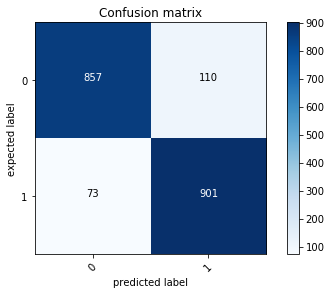

In [191]:

cm = confusion_matrix(test_set['label'], all_predictions1)
plot_confusion_matrix(cm, classes=[0, 1])
plt.title('Confusion matrix')
plt.ylabel('expected label')
plt.xlabel('predicted label')



### Naive Bayes using Count Vectorizer

In [192]:
count_vectorizer = CountVectorizer( max_features=200000, stop_words='english', min_df=0.002, max_df=0.5, ngram_range=(1,3))
cv = count_vectorizer.fit(train_set['text'])
%time train_count_matrix = cv.transform(train_set['text'])

Wall time: 10.1 s


In [193]:
top = SelectKBest(chi2, k=15000)
train_set_selected2 = top.fit_transform(train_count_matrix, train_set['label'])

In [194]:
%time model2 = MultinomialNB().fit(train_set_selected2, train_set['label'])

Wall time: 46.9 ms


In [195]:
test_count_matrix = cv.transform(test_set['text'])
test_set_selected2 = top.transform(test_count_matrix)
all_predictions2 = model2.predict(test_set_selected2)

In [196]:
print('accuracy {}'.format(accuracy_score(test_set['label'], all_predictions2)))
print('confusion matrix\n {}'.format(confusion_matrix(test_set['label'], all_predictions2)))
print('(row=expected, col=predicted)')

accuracy 0.9036579082946935
confusion matrix
 [[865 102]
 [ 85 889]]
(row=expected, col=predicted)


Confusion matrix, without normalization
[[865 102]
 [ 85 889]]


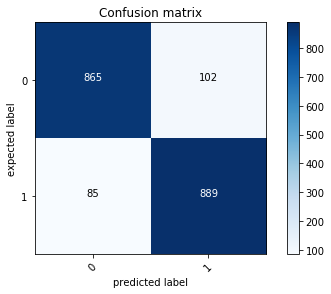

In [197]:
cm = confusion_matrix(test_set['label'], all_predictions2)
plot_confusion_matrix(cm, classes=[0, 1])
plt.title('Confusion matrix')
plt.ylabel('expected label')
plt.xlabel('predicted label')